In [1]:
import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, r2_score, classification_report

In [2]:
df = pd.read_csv('/content/Stars.csv',delimiter=',')
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [3]:
df.drop(axis=1,columns='Type').describe()

,Temperature,L,R,A_M
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


In [4]:
correl = df.drop(columns=['Spectral_Class','Color'],axis=1).corr()

correl

,Temperature,L,R,A_M,Type
Temperature,1.000000,0.393404,0.064216,-0.420261,0.411129
L,0.393404,1.000000,0.526516,-0.692619,0.676845
R,0.064216,0.526516,1.000000,-0.608728,0.660975
A_M,-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Type,0.411129,0.676845,0.660975,-0.955276,1.000000


Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)**

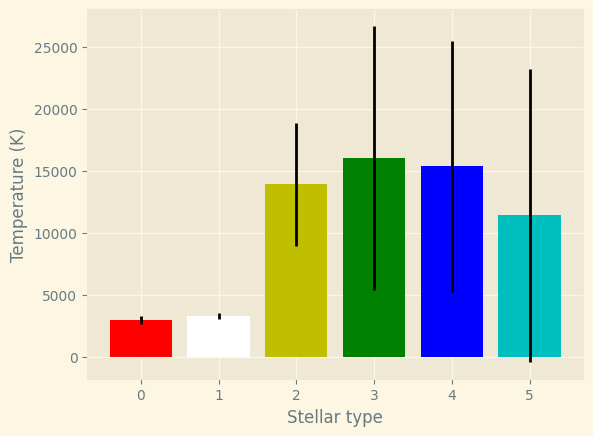

In [5]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
color = ['r','w','y','g','b','c']

for typ in df['Type'].unique():
  df_typ = df[df['Type'] == typ]
  ax.bar(typ,df_typ['Temperature'].mean(),yerr=df_typ['Temperature'].std(),color=color[typ])
ax.set_ylabel("Temperature (K)")
ax.set_xlabel("Stellar type")
plt.show()

In [6]:
df[df['Type'] == 5].Temperature.describe()

,Temperature
count,40.000000
mean,11405.700000
std,11816.991886
min,3399.000000
25%,3603.750000
50%,3766.000000
75%,18976.000000
max,38940.000000


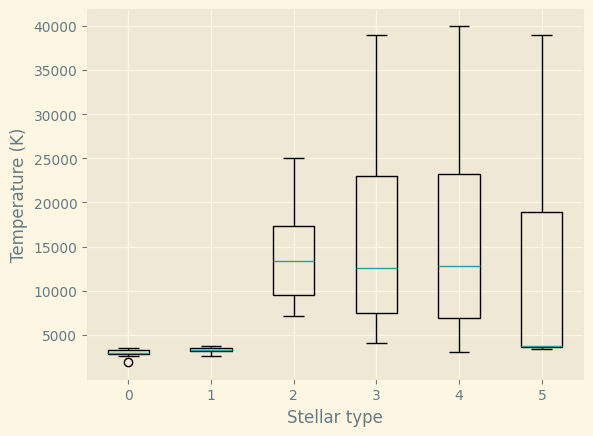

In [7]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
temps = [df[df['Type'] == typ]['Temperature'] for typ in df['Type'].unique()]
ax.boxplot(temps,labels=df['Type'].unique())
ax.set_ylabel("Temperature (K)")
ax.set_xlabel("Stellar type")
plt.show()

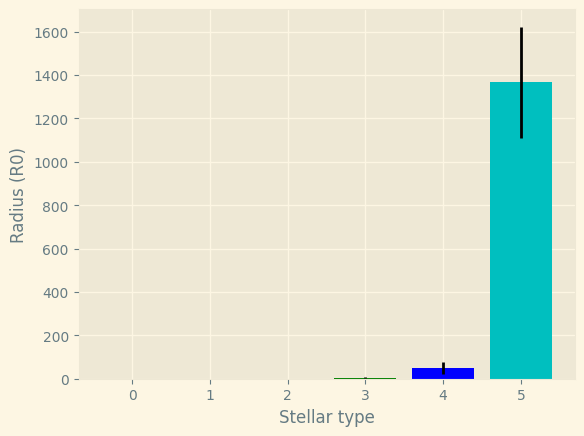

In [8]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
color = ['r','w','y','g','b','c']

for typ in df['Type'].unique():
  df_typ = df[df['Type'] == typ]
  ax.bar(typ,df_typ['R'].mean(),yerr=df_typ['R'].std(),color=color[typ])
ax.set_ylabel("Radius (R0)")
ax.set_xlabel("Stellar type")
plt.show()

In [9]:
df[df['Type'] == 5].R.describe()

,R
count,40.000000
mean,1366.897500
std,255.561357
min,708.900000
25%,1193.000000
50%,1352.500000
75%,1525.000000
max,1948.500000


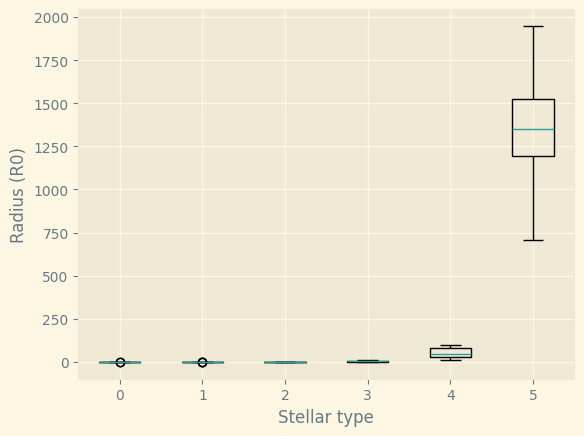

In [10]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
radius = [df[df['Type'] == typ]['R'] for typ in df['Type'].unique()]
ax.boxplot(radius,labels=df['Type'].unique())
ax.set_ylabel("Radius (R0)")
ax.set_xlabel("Stellar type")
plt.show()

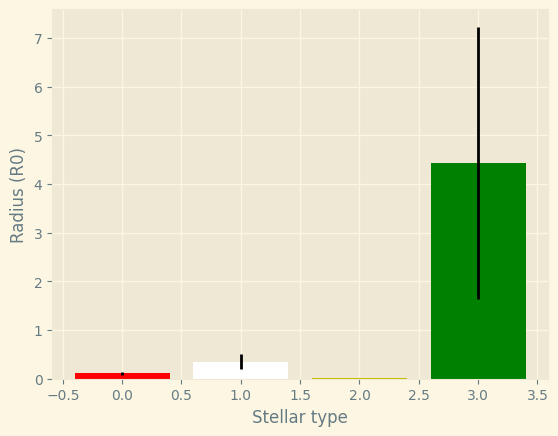

In [11]:
df_1 = df[df['Type'] < 4]

plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
color = ['r','w','y','g','b','c']

for typ in df_1['Type'].unique():
  df_typ = df[df['Type'] == typ]
  ax.bar(typ,df_typ['R'].mean(),yerr=df_typ['R'].std(),color=color[typ])
ax.set_ylabel("Radius (R0)")
ax.set_xlabel("Stellar type")
plt.show()

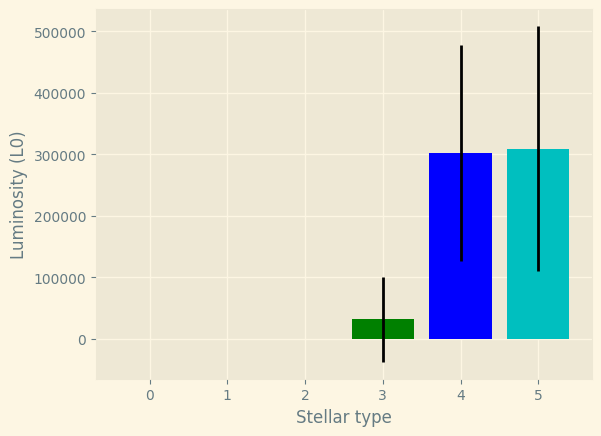

In [12]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
color = ['r','w','y','g','b','c']

for typ in df['Type'].unique():
  df_typ = df[df['Type'] == typ]
  ax.bar(typ,df_typ['L'].mean(),yerr=df_typ['L'].std(),color=color[typ])
ax.set_ylabel("Luminosity (L0)")
ax.set_xlabel("Stellar type")
plt.show()

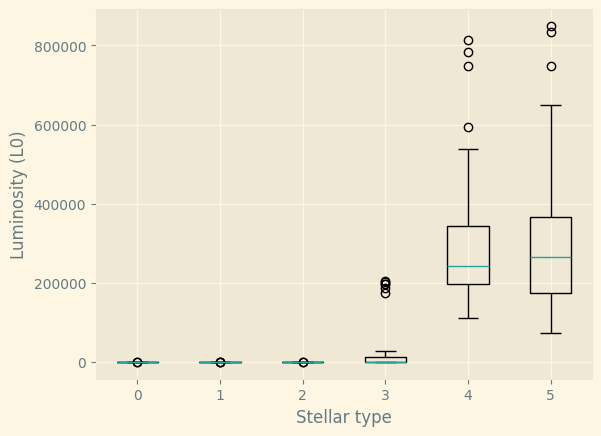

In [13]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
lums = [df[df['Type'] == typ]['L'] for typ in df['Type'].unique()]
ax.boxplot(lums,labels=df['Type'].unique())
ax.set_ylabel("Luminosity (L0)")
ax.set_xlabel("Stellar type")
plt.show()

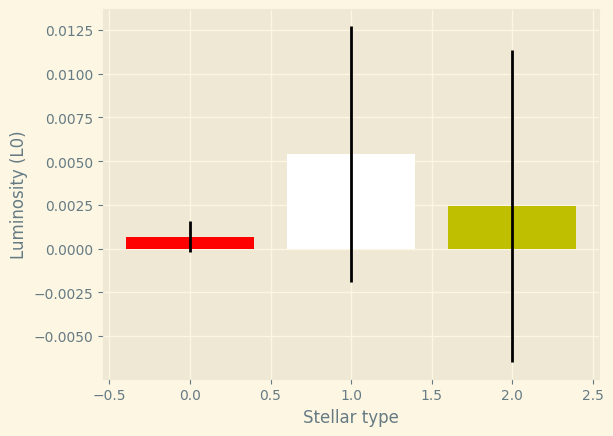

In [14]:
df_1 = df[df['Type'] < 3]

plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
color = ['r','w','y','g','b','c']

for typ in df_1['Type'].unique():
  df_typ = df[df['Type'] == typ]
  ax.bar(typ,df_typ['L'].mean(),yerr=df_typ['L'].std(),color=color[typ])
ax.set_ylabel("Luminosity (L0)")
ax.set_xlabel("Stellar type")
plt.show()

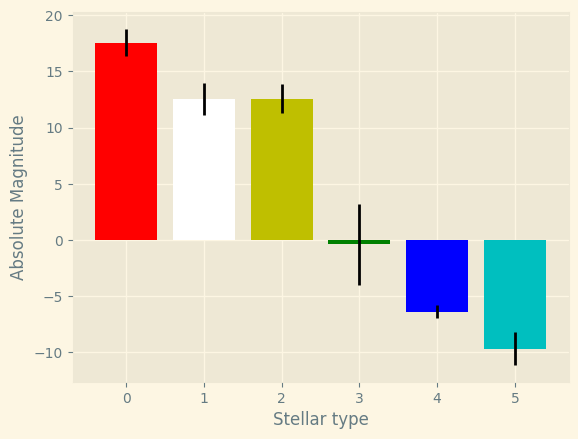

In [15]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
color = ['r','w','y','g','b','c']

for typ in df['Type'].unique():
  df_typ = df[df['Type'] == typ]
  ax.bar(typ,df_typ['A_M'].mean(),yerr=df_typ['A_M'].std(),color=color[typ])
ax.set_ylabel("Absolute Magnitude")
ax.set_xlabel("Stellar type")
plt.show()

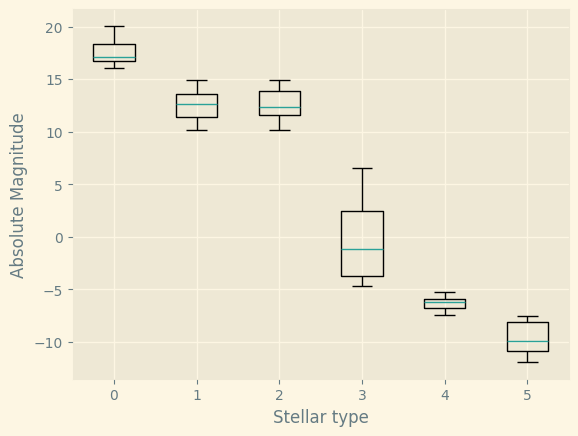

In [16]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
ams = [df[df['Type'] == typ]['A_M'] for typ in df['Type'].unique()]
ax.boxplot(ams,labels=df['Type'].unique())
ax.set_ylabel("Absolute Magnitude")
ax.set_xlabel("Stellar type")
plt.show()

In [17]:
df.groupby(['Color','Type']).agg(count_color = ('Color','count'))

count_color
Color              Type             
Blue               2              13
                   3               5
                   4              31
                   5               7
Blue White         2              10
Blue white         2               4
Blue-White         3               1
Blue-white         3              20
                   5               6
Orange             5               2
Orange-Red         3               1
Pale yellow orange 2               1
Red                0              40
                   1              40
                   4               9
                   5              23
White              2               5
                   5               2
White-Yellow       2               1
Whitish            3               2
Yellowish          3               1
Yellowish White    2               3
white              2               3
yellow-white       3               8
yellowish          3               2

In [18]:
df['Color'] = df['Color'].str.capitalize()
df['Color'] = df['Color'].str.replace(' ','-')
df['Color'] = df['Color'].str.replace('White-yellow','Yellow-white')
df['Color'] = df['Color'].str.replace('Whitish','White')
df['Color'] = df['Color'].str.replace('Yellowish','Yellow')
df.to_csv('star_class.csv')
df['Color'].unique()

array(['Red', 'Blue-white', 'White', 'Yellow-white', 'Pale-yellow-orange',
       'Blue', 'Orange', 'Yellow', 'Orange-red'], dtype=object)

In [19]:
df.groupby(['Color','Type']).agg(count_color = ('Color','count'))

count_color
Color              Type             
Blue               2              13
                   3               5
                   4              31
                   5               7
Blue-white         2              14
                   3              21
                   5               6
Orange             5               2
Orange-red         3               1
Pale-yellow-orange 2               1
Red                0              40
                   1              40
                   4               9
                   5              23
White              2               8
                   3               2
                   5               2
Yellow             3               3
Yellow-white       2               4
                   3               8

In [20]:
df.groupby(['Color','Spectral_Class']).agg(count_color = ('Color','count'))

count_color
Color              Spectral_Class             
Blue               B                        16
                   O                        40
Blue-white         A                        12
                   B                        29
Orange             K                         1
                   M                         1
Orange-red         K                         1
Pale-yellow-orange F                         1
Red                G                         1
                   K                         1
                   M                       110
White              A                         7
                   B                         1
                   F                         4
Yellow             K                         3
Yellow-white       F                        12

In [21]:
df_groupby = df.groupby(['Spectral_Class', 'Type'])\
    .agg(count_spec=('Spectral_Class', 'count'), temp_mean=('Temperature', 'mean'))

df_groupby = df_groupby.sort_values(by=['Spectral_Class','temp_mean'],ascending = False)
df_groupby

count_spec     temp_mean
Spectral_Class Type                          
O              3              5  35911.600000
               5              6  32730.666667
               4             29  17786.931034
M              5             22   3602.272727
               4              9   3449.222222
               1             40   3283.825000
               0             40   2997.950000
K              3              4   4673.750000
               5              2   4151.000000
G              5              1   6850.000000
F              2              9  10339.555556
               3              8   6466.250000
B              4              2  33525.000000
               3             13  21681.384615
               5              7  21054.000000
               2             24  16839.166667
A              3             10  10887.900000
               5              2   9032.000000
               2              7   8580.285714

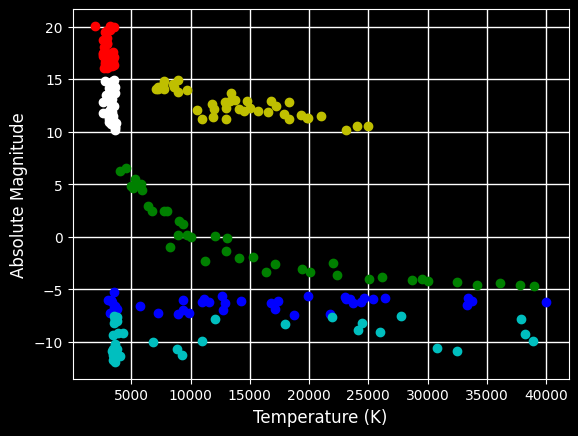

In [22]:
plt.style.use('dark_background')
fig, ax = plt.subplots()
color = ['r','w','y','g','b','c']

for typ in df['Type'].unique():
  x = df[df['Type'] == typ].Temperature
  y = df[df['Type'] == typ].A_M
  ax.scatter(x,y,c=color[typ])
ax.set_ylabel("Absolute Magnitude")
ax.set_xlabel("Temperature (K)")
plt.show()

In [23]:
X = df.drop(columns=['Type','Spectral_Class','Color'],axis=1)
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
prediction = reg.predict(X_test)

dictiona = {'prev':prediction,'real':y_test}
dictiona = pd.DataFrame(dictiona)
dictiona['prev'] = round(dictiona['prev'])
dictiona['error'] = dictiona['prev'] - dictiona['real']
dictiona['sq_error'] = (dictiona['prev'] - dictiona['real'])**2

dictiona.sq_error.describe()

,sq_error
count,60.000000
mean,0.333333
std,0.475383
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [24]:
X = df.drop(columns=['Type','Spectral_Class','Color'],axis=1)
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
prediction = reg.predict(X_test)

print(f'R^2: {round((r2_score(y_test,prediction)*100),2)}%\n')

dictiona_1 = {'prev':prediction,'real':y_test}
dictiona_1 = pd.DataFrame(dictiona_1)
dictiona_1['error'] = dictiona_1['prev'] - dictiona_1['real']
dictiona_1['sq_error'] = (dictiona_1['prev'] - dictiona_1['real'])**2

dictiona_1.sq_error.describe()

R^2: 94.38%



,sq_error
count,60.000000
mean,0.175012
std,0.186718
min,0.000010
25%,0.020816
50%,0.089958
75%,0.332412
max,0.747466


In [25]:
def class_prob(array,df_pred,regr):
  if len(array) != len(df_pred.columns):
    raise Exception("Given data doesn't match with dataframe columns")
  else:
    cols = df_pred.columns
    i = 0
    dicti = {}
    while i < len(array):
      dicti[cols[i]] = [array[i]]
      i += 1
    dat = pd.DataFrame(dicti)
    predic = regr.predict(dat)
    a = int(predic[0])
    b = a + 1
    dict_prev = {}
    dict_prev['Type'] = [a,b]
    dict_prev['Prob'] = [(1 - abs(predic - a))[0],(1 - abs(predic - b))[0]]
    prev = pd.DataFrame(dict_prev)
    return prev

In [26]:
X = df.drop(columns=['Type','Spectral_Class','Color'],axis=1)
y = [5000,16,4,-11]

class_prob(y,X,reg)

,Type,Prob
0,4,0.485822
1,5,0.514178


In [27]:
X = df.drop(columns=['Type','Spectral_Class','Color'],axis=1)
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

perc = Perceptron(random_state=42)
perc.fit(X_train,y_train)
y_prev = perc.predict(X_test)

print(f'Accuracy score in Perceptron model is {round(accuracy_score(y_test,y_prev)*100,2)}%')

Accuracy score in Perceptron model is 31.67%


In [28]:
X = df.drop(columns=['Type','Spectral_Class','Color'],axis=1)
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

newt = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(6, activation='softmax')
])

newt.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

newt.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

y_pred = newt.predict(X_test)
y_pred = y_pred.argmax(axis=1)

print(f'Accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}%')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.1848 - loss: 1.8346 - val_accuracy: 0.1667 - val_loss: 1.7561
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1955 - loss: 1.7541 - val_accuracy: 0.2222 - val_loss: 1.6875
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2396 - loss: 1.6989 - val_accuracy: 0.2778 - val_loss: 1.6331
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3189 - loss: 1.6622 - val_accuracy: 0.2500 - val_loss: 1.5823
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3740 - loss: 1.6101 - val_accuracy: 0.4167 - val_loss: 1.5329
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4389 - loss: 1.5525 - val_accuracy: 0.4167 - val_loss: 1.4811
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5357 - loss: 1.4864 - val_accuracy: 0.6667 - val_loss: 1.4333
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7632 - loss: 1.4648 - val_accuracy: 0.6944 - val_loss: 1.3891
Ep

In [29]:
X = df.drop(columns=['Type','Spectral_Class','Color'],axis=1)
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print(f'Accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}%\n')
print(classification_report(y_test, y_pred))

cv_scores = cross_val_score(mlp, X, y, cv=5)

print(f'Mean accuracy in cross-validation: {round(cv_scores.mean() * 100,2)}%')
print(f'Accuracy standard-deviation in cross-validation: {round(cv_scores.std() * 100,2)}%')

Accuracy: 98.33%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9
           3       1.00      0.89      0.94         9
           4       0.90      1.00      0.95         9
           5       1.00      1.00      1.00        12

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Mean accuracy in cross-validation: 28.33%
Accuracy standard-deviation in cross-validation: 5.2%
